In [26]:
#다음 코드를 실행하시오.
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
import random
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Q1. income_new는 인천광역시 사람들의 2022년, 2023년 성별 평균소득을 나타낸 데이터이다. 남자의 평균소득 데이터는 성별 column에서 1로, 여자는 2로 제시되었다.

### 1-1) income_new 데이터를 불러온 후, income에 저장하시오.

In [27]:
# 1-1 해설
income = pd.read_csv('income_new.csv')
income.head()

,성별,2022,2023
0,1,7437.0,7059.0
1,1,3066.0,2656.0
2,2,2769.0,2417.0
3,2,2055.0,2286.0
4,2,4065.0,4135.0


### 1-2) 2022년 인천광역시 남여 소득 평균의 차이를 알아보고자 한다. 남성과 여성의 평균소득 데이터를 추출하여 남자는 men 변수에, 여자는 women변수에 저장하세요.

In [28]:
# 1-2 해설
men=income[income['성별']==1]['2022']
men.head()

0     7437.0
1     3066.0
12    7313.0
13    1688.0
16    7705.0
Name: 2022, dtype: float64

In [29]:
women=income[income['성별']==2]['2022']
women.head()

2    2769.0
3    2055.0
4    4065.0
5    2779.0
6    3079.0
Name: 2022, dtype: float64

### 1-3) 플리그너(fligner) 방법으로 두 변수의 등분산 검정을 실시하세요.

In [30]:
# 1-3 해설
fligner = stats.fligner(men,women)
print('fligner Result(F) : %.3f \np-value : %.3f' % (fligner))

fligner Result(F) : 17.707 
p-value : 0.000


### 1-4) 남성과 여성의 평균소득 차이가 유의한지 확인하기 위해 적절한 t-test(독립표본)를 수행하고, 결과를 해석하시오.(유의수준 0.05)

In [31]:
# 1-4 해설
income_ttest_result = stats.ttest_ind(men, women, equal_var = False)
print('Statistic(t-Value) : %.3f  \np-value : %.28f' % income_ttest_result)

Statistic(t-Value) : 4.709  
p-value : 0.0000025324590880151662645201


결과 해석 : p-value가 유의수준(0.05)보다 작으므로, 남여 소득간 차이가 있음을 알 수 있다.

## Q1.1 2022년에 인천광역시는 시민들을 대상으로 금융 교육 프로그램을 실시하였다. 이 프로그램이 효과가 있었는지 2023년 소득을 통해 알아보고자 한다. (대응 표본 t-test)

### 1-5) 2022년 소득 데이터를 2022에, 2023년 소득 데이터는 2023에 array 형식으로 저장하고, 상황에 알맞은 t-test를 수행하시오.

In [32]:
# 1-5 해설
before = np.array(income['2022'])
after = np.array(income['2023'])
paired_ttest_result = stats.ttest_rel(after, before)
print(f"t-value : {paired_ttest_result[0]} \np-value : {paired_ttest_result[1]}")

t-value : 10.842295479180699 
p-value : 2.87864991213308e-27


## Q2. 다음 데이터는 A백화점의 고객데이터이다. A백화점의 마케터는 고객들의 지불방법에 따른 각각의 프로모션을 기획하려고 하는데, 그 중 가장 지불금액이 큰 지불방법에 이번 마케팅 프로모션을 진행하기로 했다. 지불방법에 대한 총 지불금액에 있어 차이가 있는지 확인해보고 어떤 지불방법에 대한 프로모션을 기획해야 하는지 확인해보자. 
지불방법 설명
1. Electronic check	: 전자수표
2. Mailed check : 우편수표
3. Bank transfer : 계좌이체
4. Credit card : 신용카드

In [33]:
customer = pd.read_csv("customer.csv")
customer

,PaymentMethod,TotalCharges
0,Electronic check,29.85
1,Mailed check,1889.50
2,Mailed check,108.15
3,Bank transfer (automatic),1840.75
4,Electronic check,151.65
...,...,...
7027,Mailed check,1990.50
7028,Credit card (automatic),7362.90
7029,Electronic check,346.45
7030,Mailed check,306.60


### 2-1) 귀무가설과 대립가설을 세우세요.

- 귀무가설 : 지불방법에 대한 집단의 평균이 같다.
- 대립가설 : 지불방법에 대한 평균이 같지 않다.

### 2-2) 데이터셋에 대한 정보와 결측치, 기술통계량을 확인하시오.

In [34]:
#데이터 확인 : info()
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PaymentMethod  7032 non-null   object 
 1   TotalCharges   7032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.0+ KB


In [35]:
#결측치 확인
customer.isnull().sum()

PaymentMethod    0
TotalCharges     0
dtype: int64

In [36]:
#기술통계량
customer.describe()

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


### 2-3) boxplot을 통해 지불방법 별로 차이가 있는지 확인하시오.

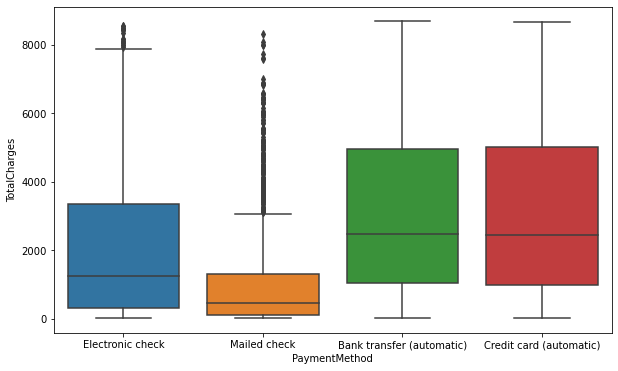

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "PaymentMethod", y = "TotalCharges", data = customer)
plt.show()

### 2-3) violinplot을 통해 지불방법 별로 차이가 있는지 확인하시오.

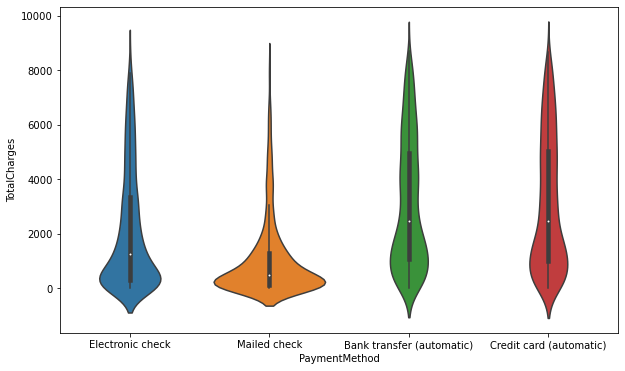

In [38]:
plt.figure(figsize=(10,6))
sns.violinplot(x = "PaymentMethod", y = "TotalCharges", data = customer)
plt.show()

### 2-4) 분산분석을 시행하고 해석하세요.
결과값 해석 : 지불방법에 따라 총지불금액이 차이가 있다.

In [40]:
type1 = customer[customer['PaymentMethod'] == "Electronic check"]['TotalCharges']
type2 = customer[customer['PaymentMethod'] == "Mailed check"]['TotalCharges']
type3 = customer[customer['PaymentMethod'] == "Bank transfer (automatic)"]['TotalCharges']
type4 = customer[customer['PaymentMethod'] == "Credit card (automatic)"]['TotalCharges']

oneway_anova_result = stats.f_oneway(type1, type2, type3, type4)
oneway_anova_result

print(f'F-Value : {oneway_anova_result[0]:.4f} P-value : {oneway_anova_result[1]:.3f}')

F-Value : 327.5237 P-value : 0.000


### 2-5) 등분산성을 검정하세요.

In [41]:
levene = stats.levene(type1, type2, type3, type4)
print('levene result(F) : %.3f \np-value : %.3f' % (levene))

levene result(F) : 218.926 
p-value : 0.000


### 2-6) 어떤 지불 방법에 대한 프로모션을 기획해야 하는지 구하시오.

In [42]:
customer.groupby('PaymentMethod')['TotalCharges'].mean()

PaymentMethod
Bank transfer (automatic)    3079.299546
Credit card (automatic)      3071.396022
Electronic check             2090.868182
Mailed check                 1054.483915
Name: TotalCharges, dtype: float64

Bank transfer (automatic) 의 총지불금액이 가장 높으므로 계좌이체에 대한 프로모션을 기획해야 한다.

## Q3. 수학 성적 문제

A_score 리스트는 A 고등학교 전체 학생 300명의 수학 모의고사 성적 데이터이다. 
<br>먼저, 다음 코드를 실행하시오.

In [43]:
random.seed(1)
A_score = np.array([])
for i in range(1,301):
    sc = random.randint(1,100)
    A_score = np.append(A_score,sc)

### 3-1) A 고등학교 수학 모의고사 모평균을 구하시오.

In [44]:
#답
np.mean(A_score)

51.36

### 

### * 가설 검정의 단계를 순서대로 진행해보자.

B 고등학교 학생은 A 학교와 수학 성적을 비교하기 위해 가설 검정을 이용하기로 한다.
<br>B 고등학교 학생 표본 30명의 시험 점수는 다음과 같다. 

In [45]:
B_score = np.array([26, 55, 52, 33, 59, 27, 25, 59, 42, 40, 66, 26, 52, 58, 48, 46, 40,
       27, 39, 56, 55, 43, 39, 50, 48, 44, 66, 49, 32, 56])

### * 가설 설정

### 3-2) 귀무가설과 대립가설을 설정하시오.

In [46]:
#답
#H0 : A 고등학교 수학 평균 51.36 = B 고등학교 학생 표본 30명의 수학 평균 성적 
#H1 : A 고등학교 수학 평균 51.36점 ≠ B 고등학교 학생 표본 30명의 수학 평균 성적

### * 검정통계량 선택

평균에 대한 가설 검정이므로 t-검정 선택

### * 기각역 설정

### 3-3)  유의수준 0.05의 T-value(양측)를 다음 T분포표를 이용해 찾으시오.

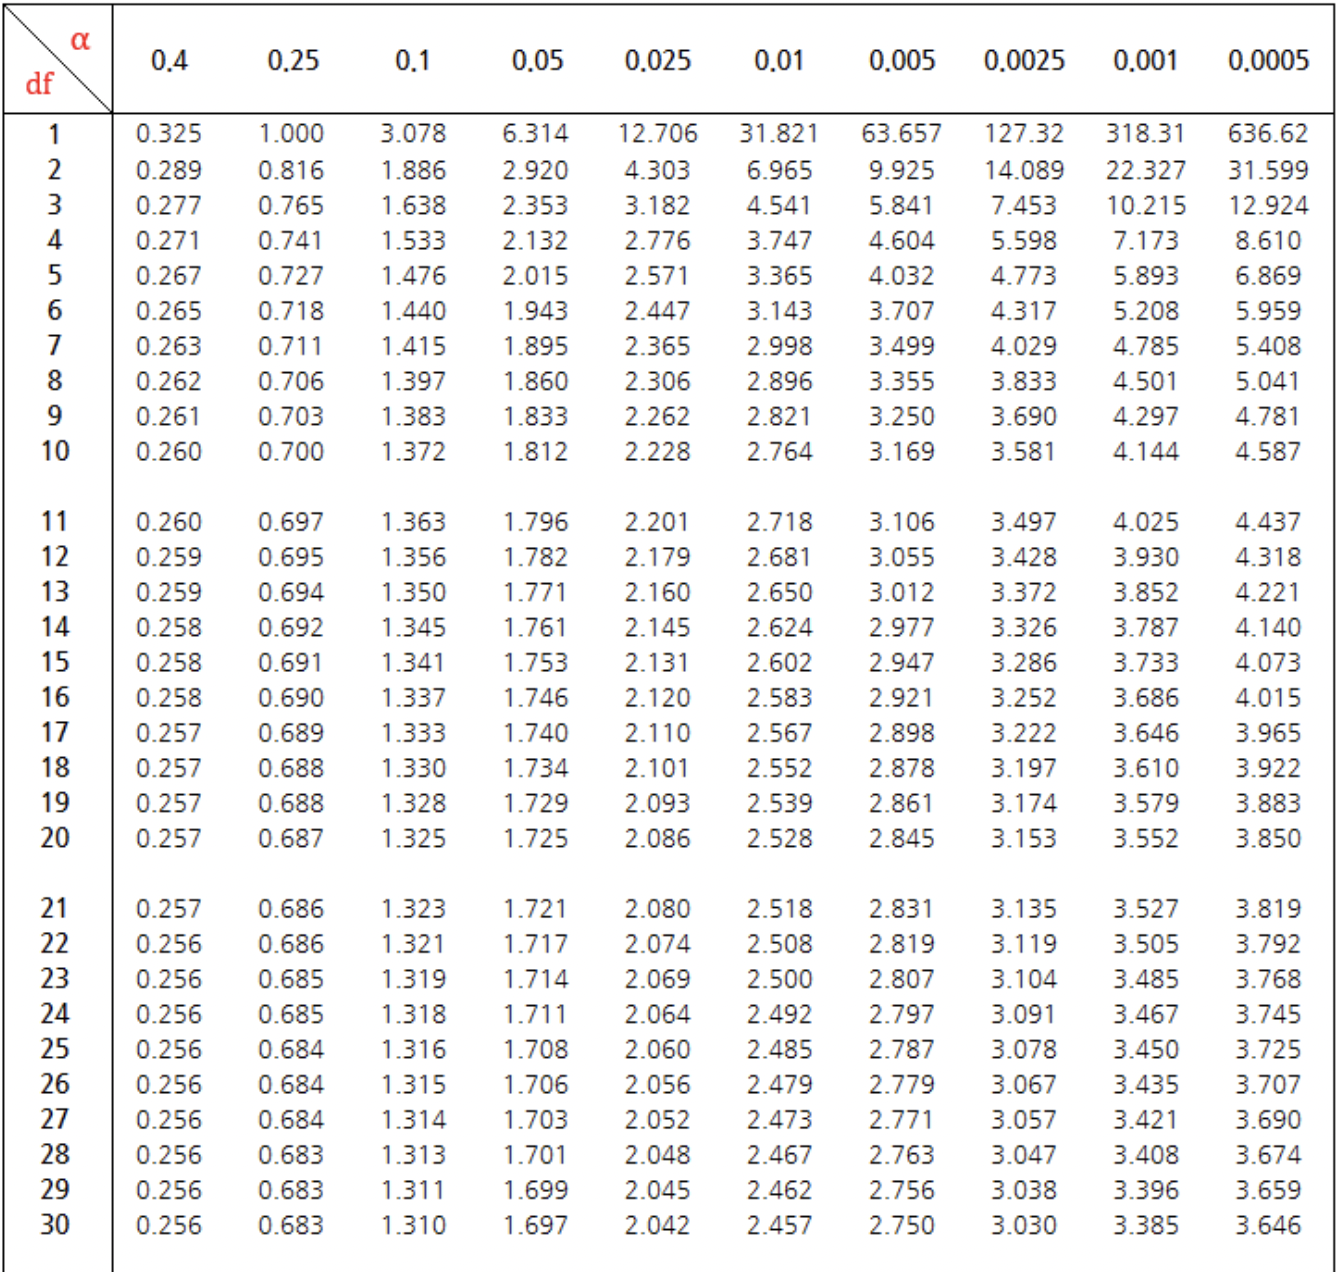

In [53]:
from IPython.display import Image
Image("/Users/parksoyeon/Desktop/비타민/멤버세션_1학기/1주차_230308/복습과제/최종복습과제/T.png")

<br>
<img src="T.png" width="50%" height="50%" title="px(픽셀) 크기 설정" alt="RubberDuck"></img>

In [ ]:
#답
#T(0.025,29) = (±)2.045

### * p-value 계산

### 3-4) t-value와 p-value를 도출하시오.

In [51]:
#답
one_sample = stats.ttest_1samp(B_score,51.36)
print('Statistic(t-Value) : %.3f P-value : %.4f' % one_sample)

Statistic(t-Value) : -2.754 P-value : 0.0101


### * 가설 검정

### 3-5) t-Value 값과 P-value 값으로 가설 검정하시오. (유의수준 0.05)

In [54]:
#답
#p-value가 유의 수준인 0.05보다 작음(또는 |t-value|가 기각역에 해당하는 |(±)2.045|보다 큼)
#따라서 귀무가설을 기각할 수 있다. 즉, B 고등학교는 A 고등학교보다 수학 모의고사를 잘 봤다고 할 수 있다.

### * 시각화

### 3-6) Seaborn의 distplot을 이용해 표본 데이터에 대한 히스토그램을 시각화하시오. 
<br><조건> 
<br>1. 히스토그램 범례명은 'B_score', x축 라벨명은 'B'로 지정
<br>2. 밀도함수인 kde 숨기기
<br>3. 실제 30개의 데이터를 빗금으로 표시하는 옵션 추가
<br>4. 정규분포 곡선 표시

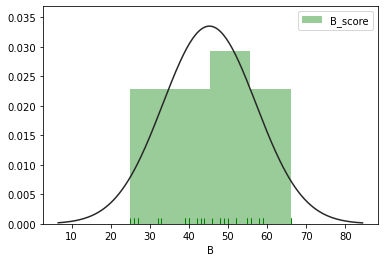

In [55]:
#답
ax = sns.distplot(B_score, kde=False, fit=stats.norm, label = 'B_score', color = 'green', rug = True)
ax.set(xlabel = "B")
plt.legend()
plt.show()

## Q4. 철수는 A반과 B반 학생들의 키에 유의미한 차이가 있을 것으로 생각해 검정을 진행해 보기로 한다.

In [56]:
df_height_A = pd.DataFrame({'A':[170,171,168,166,178,175,173,181,171,171,170,164,173,171,169,168,171,169,174,167,168,166,171,170,170,174,171,169,168,174]})
df_height_B = pd.DataFrame({'B':[175,168,177,173,173,171,183,181,167,175,174,172,177,178,175,169,181,173,177,174,174,180,165,177,173,172,180,169,168,177]})

#A와 B를 따로 제공한 후 merge하게끔 시키기

### 4-1) 각 반의 평균값을 포함한 데이터를 확인해보자.

In [58]:
print(df_height_A.describe())
print(df_height_B.describe())

                A
count   30.000000
mean   170.700000
std      3.544301
min    164.000000
25%    168.250000
50%    170.500000
75%    172.500000
max    181.000000
                B
count   30.000000
mean   174.266667
std      4.494697
min    165.000000
25%    172.000000
50%    174.000000
75%    177.000000
max    183.000000


### 4-2) df_height_A랑 df_height_B 히스토그램을 겹쳐서 그리시오.

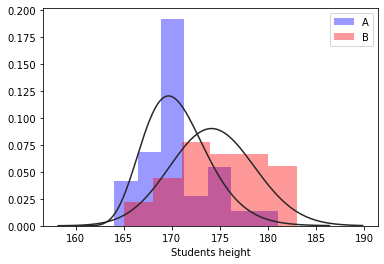

In [60]:
ax1 = plt.subplots()
ax1 = sns.distplot(df_height_A, kde = False, fit = stats.gamma, label = 'A', color = 'blue')
ax1 = sns.distplot(df_height_B, kde = False, fit = stats.gamma, label = 'B', color = 'red')
ax1.set(xlabel = 'Students height')

plt.legend()
plt.show()

### 4-3) A반과 B반의 데이터를 합쳐서 df_height에 저장하시오.

In [61]:
df_height = pd.concat([df_height_A, df_height_B],axis = 1)
df_height

,A,B
0,170,175
1,171,168
2,168,177
3,166,173
4,178,173
5,175,171
6,173,183
7,181,181
8,171,167
9,171,175


### 4-4) 등분산 검정 3가지를 모두 진행하시오.

In [62]:
levene = stats.levene(df_height.A,df_height.B,)
print('levene result(F):%.3f\np-value:%.3f'%(levene))

fligner = stats.fligner(df_height.A,df_height.B,)
print('fligner Result(F):%.3f\np-value:%.3f'%(fligner))

bartlett = stats.bartlett(df_height.A,df_height.B,)
print('bartlett Result(F):%3f\np-value:%.3f'%(bartlett))

levene result(F):2.132
p-value:0.150
fligner Result(F):2.072
p-value:0.150
bartlett Result(F):1.593924
p-value:0.207


### 4-5) 위의 결과를 토대로 등분산인지 아닌지 판단해보자.(유의수준 0.05)

In [64]:
# 답: p-value가 0.05보다 크기 때문에 두 집단의 분산이 같다고 말할 수 있다.(등분산이다)

### 4-6) 이 문제에 맞는 적절한 검정법으로 검정해보자.

In [66]:
ind_ttest_result = stats.ttest_ind(df_height.A,df_height.B,equal_var = True)
print('Statistic(t-value):%.3f p-value:%.28f'%ind_ttest_result)

Statistic(t-value):-3.413 p-value:0.0011778496201307734649044168


### 4-7) 도출된 p-value값을 통해 귀무가설을 기각할 수 있는지 판단해보자.

In [68]:
# 답: p-value가 0.05보다 작기 때문에 귀무가설을 기각할 수 있다. 